# Pymaceuticals Inc.
---

### Analysis

- Mice treated with Infubinol and Ceftamin show higher variability in final tumor volumes.
- Capomulin and Ramicane showed lower final tumor volumes on average, indicating better performance.
- Infubinol and Ceftamin had higher variability in tumor sizes, suggesting less consistent results.
- Younger and older mice both responded to treatments, with age not being a significant limiting factor.

 

In [516]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how="left")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [517]:
# Check the number of unique mice

number_of_mice = combined_data['Mouse ID'].nunique()
number_of_mice

249

In [518]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [519]:
# Optional: Get all the data for the duplicate mouse ID.

duplicate_mouse_data = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_mouse_data 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [520]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data=combined_data[combined_data['Mouse ID'] != 'g989']
'g989' in clean_data['Mouse ID'].unique()
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [521]:
# Checking the number of mice in the clean DataFrame.

clean_mice = clean_data['Mouse ID'].nunique()
clean_mice

248

## Summary Statistics

In [523]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

grouped_data = clean_data.groupby('Drug Regimen')
mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_table = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume SEM': sem_tumor_volume

    })

summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [524]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary_table_agg = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(["mean","median","var","std","sem"])

summary_table_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mouse Timepoints per Drug Regimen')

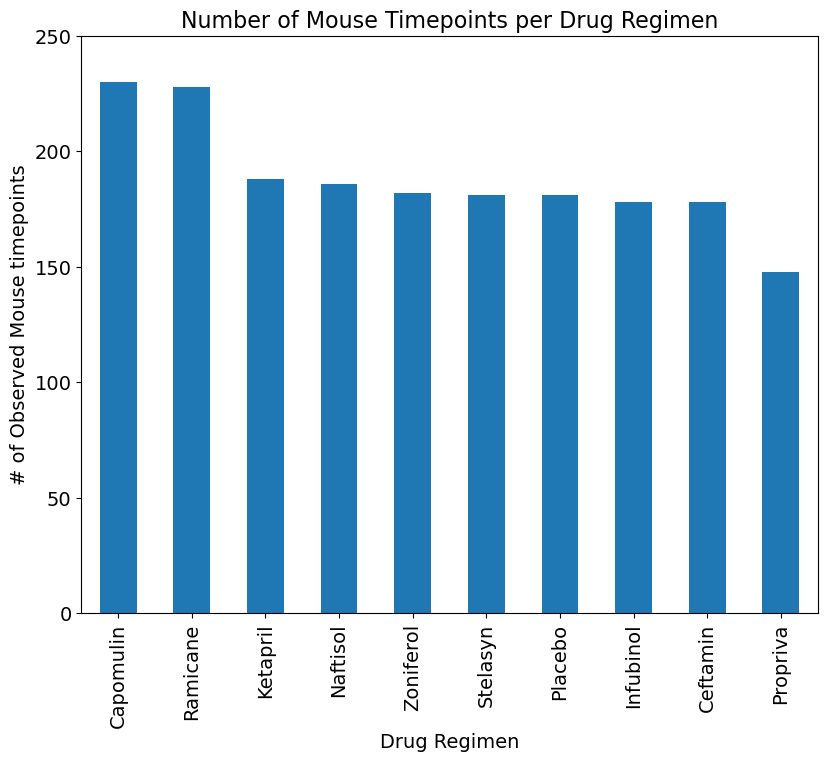

In [526]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = clean_data['Drug Regimen'].value_counts()
fig = regimen_counts.plot(kind="bar", figsize=(9.5, 7.5))

fig.set_xlabel("Drug Regimen", size=14)
fig.set_ylabel("# of Observed Mouse timepoints", size=14)
plt.ylim(0, max(regimen_counts) + 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Number of Mouse Timepoints per Drug Regimen", size=16)


Text(0.5, 1.0, 'Number of Mouse Timepoints per Drug Regimen')

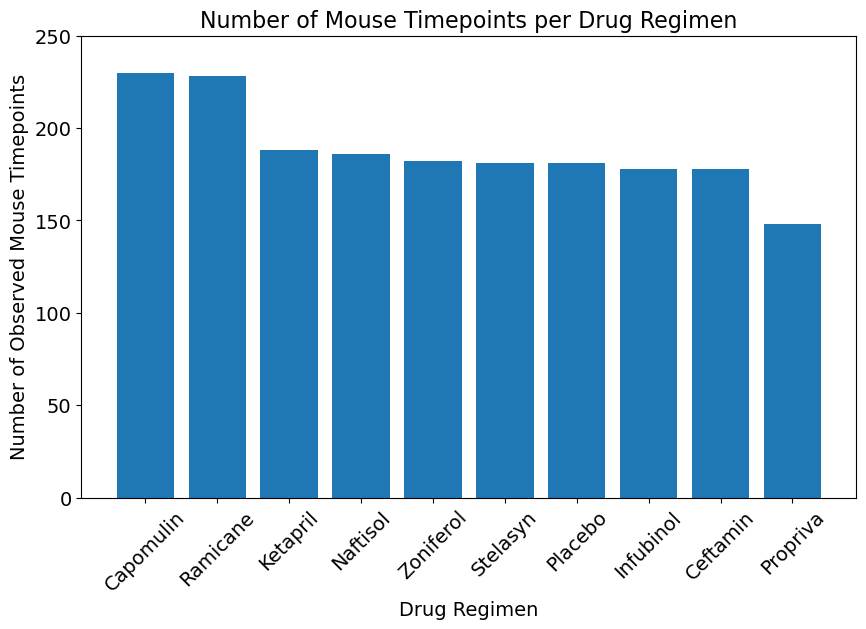

In [527]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_count = clean_data['Drug Regimen'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(drug_count.index, drug_count.values)
plt.xlabel("Drug Regimen", size=14)
plt.ylabel("Number of Observed Mouse Timepoints", size=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, max(drug_count) + 20)
plt.title("Number of Mouse Timepoints per Drug Regimen", size=16)

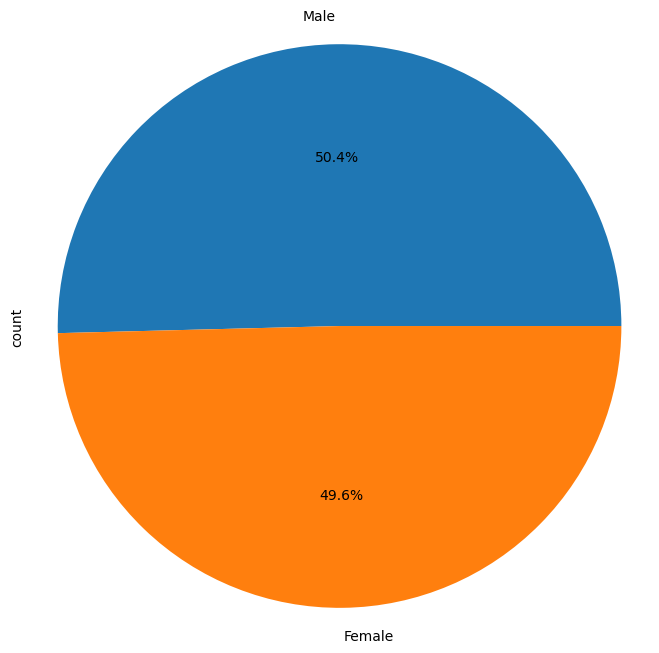

In [528]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

unique_mice = clean_data[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()
plt.figure(figsize=(8, 8))
gender_counts.plot(kind='pie', autopct="%1.1f%%", ylabel="count")
plt.axis('equal')
plt.show()

# Make the pie chart


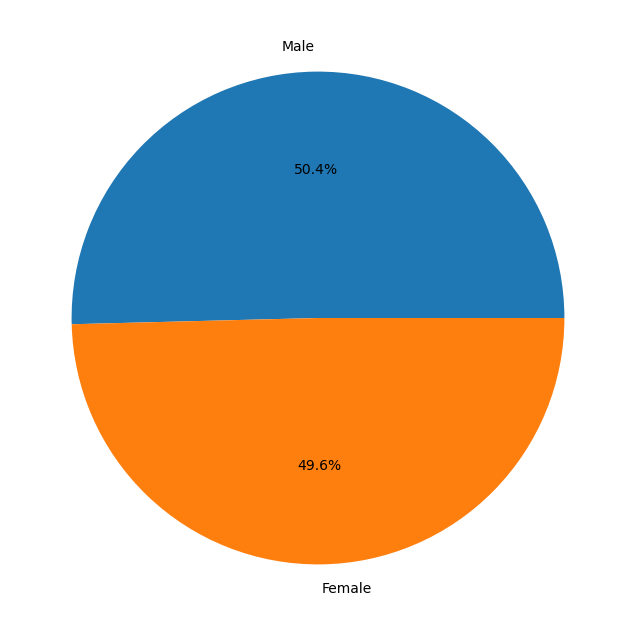

In [529]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

unique_mice = clean_data[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%") 
plt.show()

# Make the pie chart


## Quartiles, Outliers and Boxplots

In [531]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

mice_data = clean_data.groupby(["Mouse ID"]).max()
mice_data_reset = mice_data.reset_index()
merged_data = mice_data_reset[['Mouse ID', 'Timepoint']].merge(clean_data, on=['Mouse ID', 'Timepoint'], how="left")
mice_data


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a262,45,70.717621,4,Placebo,Female,17,29
a275,45,62.999356,3,Ceftamin,Female,20,28
a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...
z435,10,48.710661,0,Propriva,Female,12,26
z578,45,45.000000,0,Ramicane,Male,11,16
z581,45,62.754451,3,Infubinol,Female,24,25


In [532]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volume.
    # add subset
    # Determine outliers using upper and lower bounds

Treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_list = []

for drug in treatment_list:

    final_tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append(final_tumor_vol)

    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    

    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
  
    print(f"{drug}'s potential outliers: {outliers}\n")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



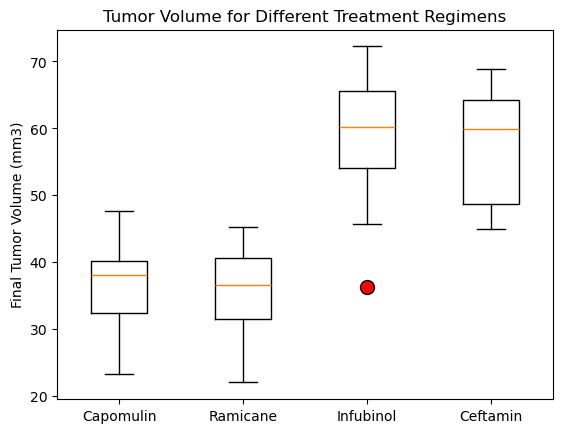

In [533]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

red_dot = dict(markerfacecolor='red', markersize=10)
plt.boxplot(tumor_vol_list, labels=treatment_list, flierprops=red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume for Different Treatment Regimens')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

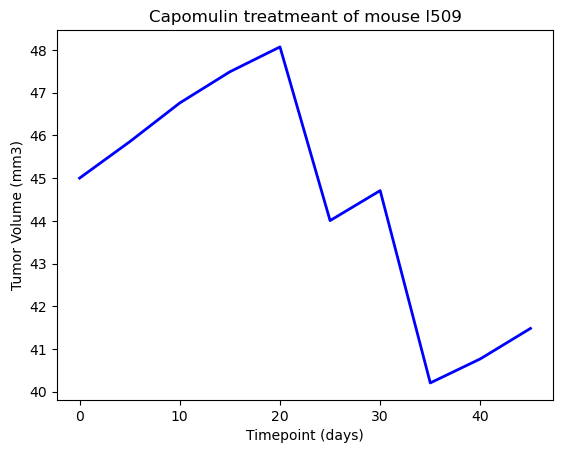

In [535]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_capomulin=clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
forline_df = mouse_capomulin.loc[mouse_capomulin["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

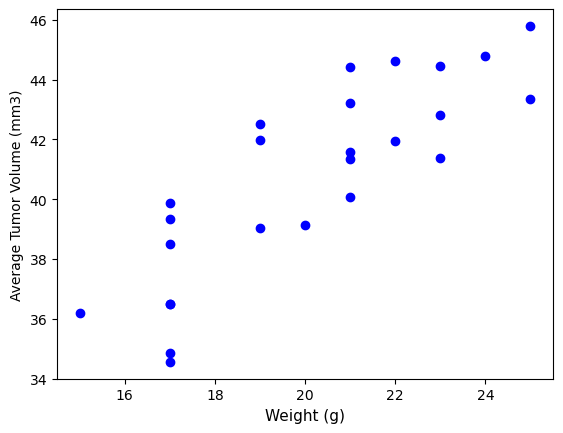

In [536]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

numeric_cols = ['Weight (g)', 'Tumor Volume (mm3)']
avg_tum_vol = mouse_capomulin.groupby(['Mouse ID'])[numeric_cols].mean()

fig1, ax1 = plt.subplots()
marker_size = 10
plt.scatter(avg_tum_vol['Weight (g)'], avg_tum_vol['Tumor Volume (mm3)'], color="blue")
plt.xlabel('Weight (g)', fontsize=11)
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse's weight and the tumor volume is 0.84


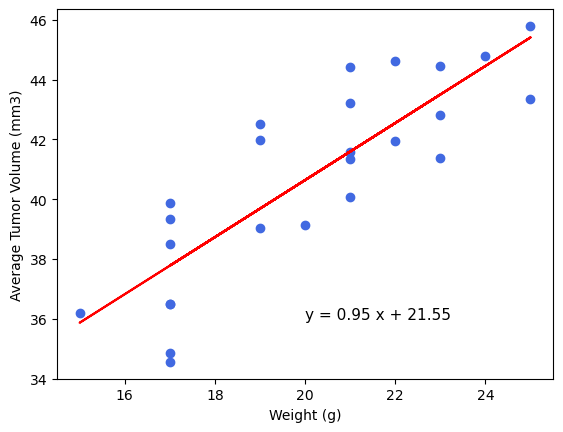

In [538]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = st.pearsonr(avg_tum_vol['Weight (g)'],avg_tum_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse's weight and the tumor volume is {round(correlation_coefficient[0],2)}")


(slope, intercept,rvalue, pvalue, stderr)=st.linregress(avg_tum_vol["Weight (g)"],avg_tum_vol["Tumor Volume (mm3)"])
regression_values=avg_tum_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_tum_vol["Weight (g)"],avg_tum_vol["Tumor Volume (mm3)"],color='royalblue')
plt.plot(avg_tum_vol["Weight (g)"], regression_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=11)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()